In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gstools as gs

from pykrige.ok  import OrdinaryKriging

In [2]:
data = pd.read_csv("red13.dat", delimiter=";")
data = data.set_index("Hole ID")
data

,Northing,Elevation,"Thickness, m",Au [g/t],Ag [g/t],"Cu, percent","Zn, percent",Rock Type
Hole ID,,,,,,,,
67,20341.5,-36.0,0.34,2.16,6.17,2.82,2.2,20
68,20344.0,-66.0,5.04,2.88,9.94,7.39,2.3,20
69,20303.0,-47.0,0.29,0.00,2.40,0.22,0.0,20
71,20305.0,-96.0,0.45,0.62,4.11,0.70,0.0,20
72,20260.0,-100.0,1.19,1.65,6.86,2.57,0.1,20
...,...,...,...,...,...,...,...,...
133,20176.0,-163.0,5.01,2.38,16.76,5.31,1.0,20
134,20281.0,-235.0,1.06,0.29,2.67,1.39,4.0,20
136,20227.0,-157.0,1.96,1.35,2.06,1.11,0.1,20


In [3]:
data.keys()

Index(['Northing', 'Elevation', 'Thickness, m', ' Au [g/t]', ' Ag [g/t]',
       'Cu, percent', 'Zn, percent', 'Rock Type'],
      dtype='object')

[ 0.34  5.04  0.29  0.45  1.19  1.74 18.86  3.68 15.71  0.    2.34  1.56
  5.71  1.5   1.64  0.16  1.01  5.07  0.76  7.4   0.83 12.83  2.58  0.
  0.35  4.31  1.64  0.36  1.62  0.34  0.    0.42  1.21  0.73  2.69 11.88
  6.23  5.89  0.    1.43 12.52  7.82  5.9   0.38  8.4   0.    0.67  0.3
  0.    0.    0.27  0.13  7.86  1.71  1.39  2.61  1.93  3.53  1.07  6.21
  0.53  0.48  5.01  1.06  1.96  4.03  1.73]


/home/atila/.local/lib/python3.10/site-packages/gstools/field/plot.py:368: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot: title={'center': 'Field 2D unstructured: (67,)'}, xlabel='$x$', ylabel='$y$'>

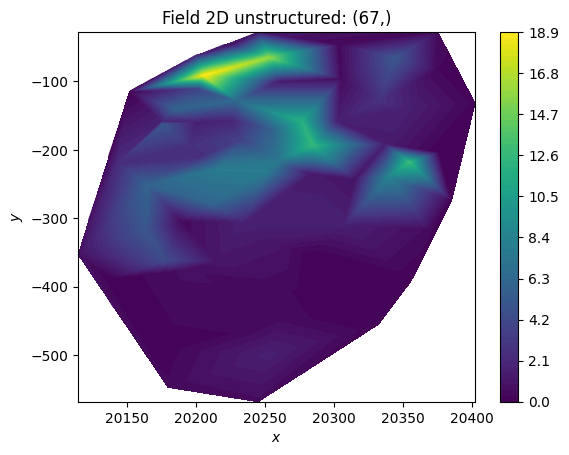

In [7]:
x = data["Northing"].values
y = data["Elevation"].values
values = data["Thickness, m"].values
print(values)

plotter = gs.field.Field(dim=2)
plotter(pos=(x, y), field=values)
plotter.plot()

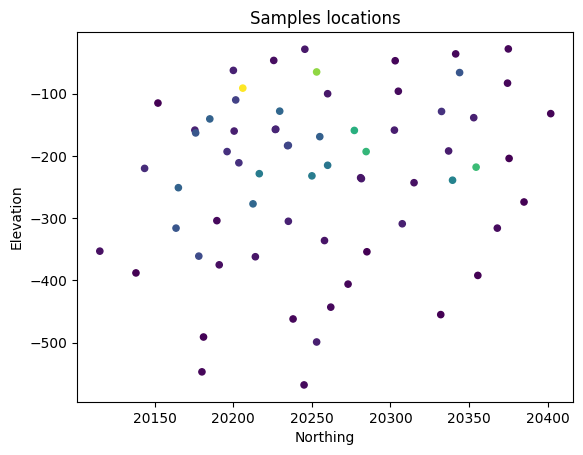

In [104]:
data.plot(x="Northing", y="Elevation", kind="scatter", c=data["Thickness, m"])
plt.title("Samples locations")
plt.savefig("../figs/samplelocations.pdf", dpi=300)

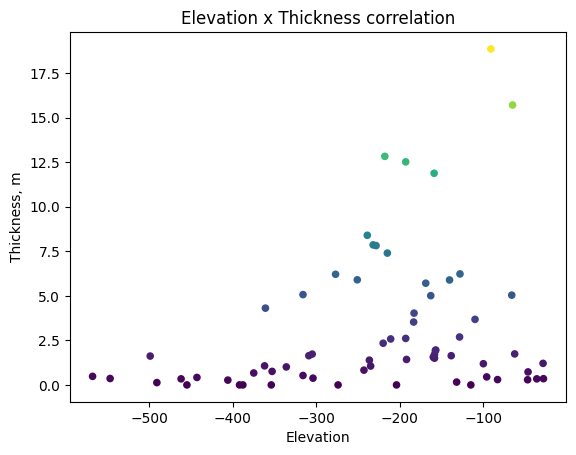

In [108]:
data.plot(x="Elevation", y="Thickness, m", c=data["Thickness, m"], kind="scatter")
plt.title("Elevation x Thickness correlation")
plt.savefig("../figs/elevationxthickness.png", dpi=300)

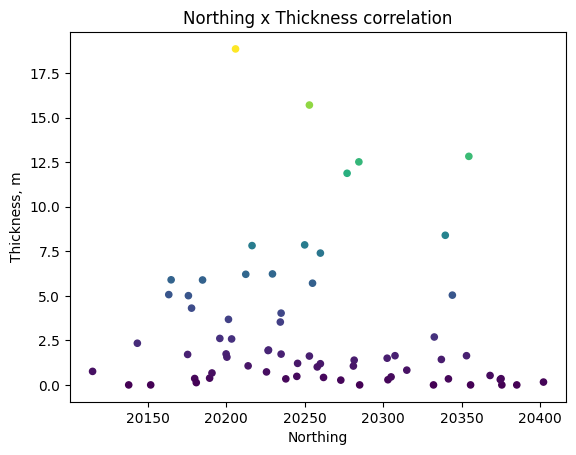

In [109]:
data.plot(x="Northing", y="Thickness, m", c=data["Thickness, m"], kind="scatter")
plt.title("Northing x Thickness correlation")
plt.savefig("../figs/northingxthickness.png", dpi=300)

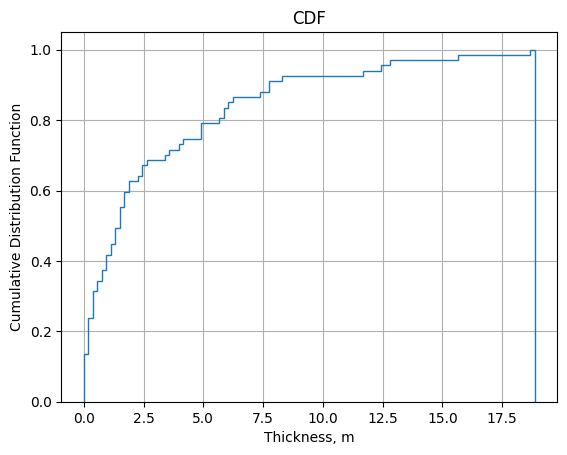

In [116]:
data["Thickness, m"].hist(cumulative=True, density=1, bins=100, histtype='step')
plt.title("CDF")
plt.xlabel("Thickness, m")
plt.ylabel("Cumulative Distribution Function")
plt.savefig("../figs/cdf.png", dpi=300)

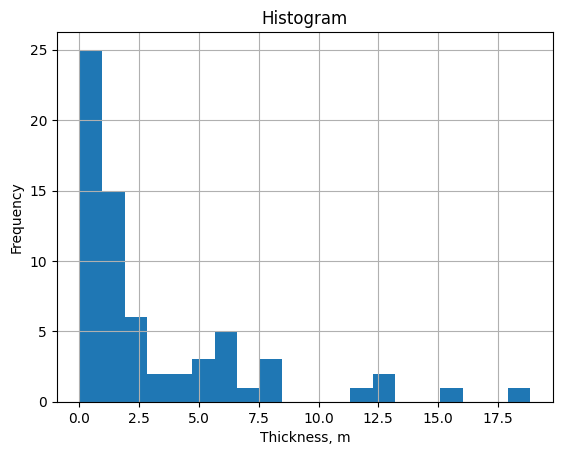

In [118]:
data["Thickness, m"].hist(bins=20)
plt.title("Histogram")
plt.xlabel("Thickness, m")
plt.ylabel("Frequency")
plt.savefig("../figs/hist.png", dpi=300)

In [122]:
corrElevation = data["Elevation"].corr(data["Thickness, m"])
corrNorthing = data["Northing"].corr(data["Thickness, m"])

print("Correlation between elevation and thickness = ", corrElevation)
print("Correlation between northing and thickness = ", corrNorthing)

Correlation between elevation and thickness =  0.2724580185189602
Correlation between northing and thickness =  -0.08857731278944365


/home/atila/.local/lib/python3.10/site-packages/gstools/covmodel/plot.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Spherical(dim=2, var=16.8, len_scale=36.0, nugget=1.54e-13)


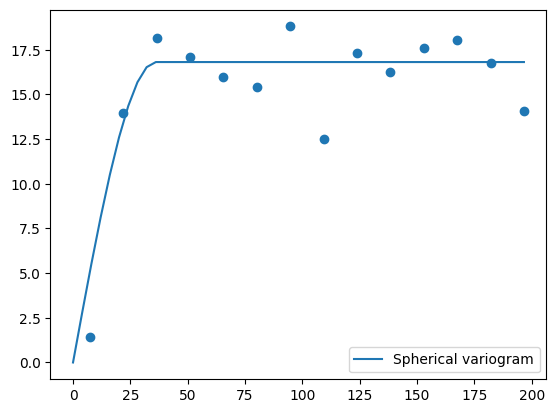

In [80]:
bin_center, gamma = gs.vario_estimate((x, y), values)
fit_model = gs.Spherical(dim=2, var=2)
fit_model.fit_variogram(bin_center, gamma, nugget=True)
ax = fit_model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)
plt.savefig("../figs/sph_variogram.png", dpi=300)
print(fit_model)

/home/atila/.local/lib/python3.10/site-packages/gstools/covmodel/plot.py:112: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Exponential(dim=2, var=16.9, len_scale=13.4, nugget=7.34e-24)


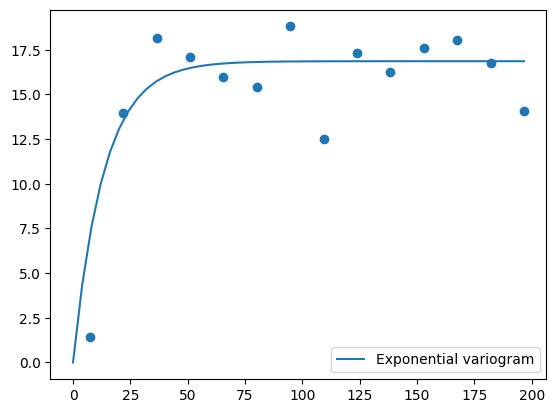

In [95]:
bin_center, gamma = gs.vario_estimate((x, y), values)
exp_model = gs.Exponential(dim=2, var=2)
exp_model.fit_variogram(bin_center, gamma, nugget=True)
ax = exp_model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)
plt.savefig("../figs/exp_variogram.png", dpi=300)
print(exp_model)

Gaussian(dim=2, var=16.8, len_scale=14.9, nugget=7.66e-19)


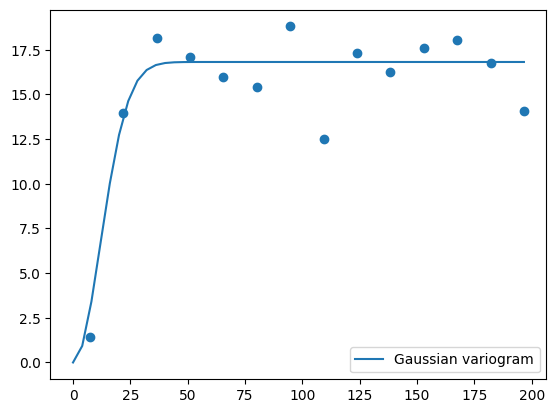

In [96]:
bin_center, gamma = gs.vario_estimate((x, y), values)
gauss_model = gs.Gaussian(dim=2, var=2)
gauss_model.fit_variogram(bin_center, gamma, nugget=True)
ax = gauss_model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)
plt.savefig("../figs/gauss_variogram.png", dpi=300)
print(gauss_model)

In [69]:
grid = gs.tools.generate_grid((x,y))
krige = gs.krige.Ordinary(fit_model, (x, y), values)
krige(grid)

(array([0.34      , 4.81262108, 2.06660377, ..., 2.69812683, 4.03      ,
        1.73      ]),
 array([3.12638804e-13, 3.31859791e+00, 1.05298524e+01, ...,
        8.80126644e+00, 2.30926389e-13, 3.26849658e-13]))

/home/atila/.local/lib/python3.10/site-packages/gstools/field/plot.py:368: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


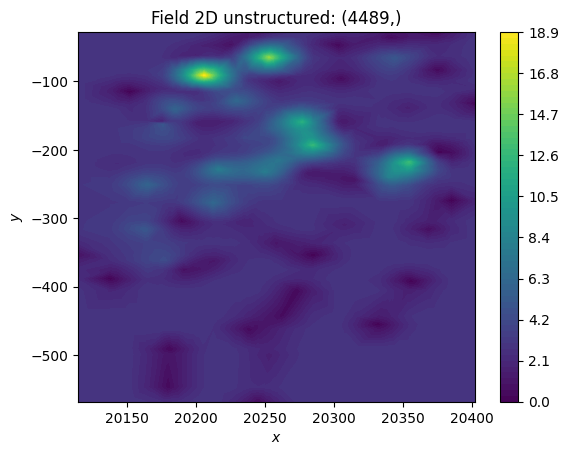

In [71]:
krige.plot()
plt.savefig("../figs/kriggingmap.png", dpi=300)

In [31]:
krige((x,y)) - values

array([[ 6.93889390e-15, -1.77635684e-15, -2.65898414e-14,
         2.54241073e-14, -7.99360578e-15, -4.15223411e-14,
        -3.55271368e-15, -2.79776202e-14, -3.90798505e-14,
         3.12030783e-15, -1.46549439e-14, -1.19904087e-14,
         2.30926389e-14, -2.95319325e-14,  1.35447209e-14,
         1.47937218e-14, -3.33066907e-15, -1.95399252e-14,
         1.36557432e-14, -1.15463195e-14,  3.00870440e-14,
         1.06581410e-14,  8.43769499e-15,  1.09523501e-14,
         3.98570066e-14,  1.06581410e-14,  0.00000000e+00,
        -1.88737914e-15, -1.37667655e-14,  1.47659662e-14,
         5.78504258e-16, -8.77076189e-15,  2.08721929e-14,
        -1.11022302e-15, -2.84217094e-14,  0.00000000e+00,
        -1.59872116e-14, -8.88178420e-16,  2.57196781e-14,
        -1.24344979e-14, -1.24344979e-14, -1.06581410e-14,
        -7.99360578e-15,  8.99280650e-15, -3.55271368e-15,
         4.66112825e-15, -3.88578059e-15,  1.98174810e-14,
        -6.53857177e-15,  7.02909952e-16,  8.88178420e-1

In [73]:
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV

param_dict = {
    "method": ["ordinary", "universal"],
    "variogram_model": [fit_model, gauss_model, exp_model],
    # "nlags": [4, 6, 8],
    # "weight": [True, False]
}

estimator = GridSearchCV(Krige(), param_dict, verbose=True, return_train_score=True)

X = np.array((x,y)).T
print(X.shape)
estimator.fit(X=X, y=values)

(67, 2)
Fitting 5 folds for each of 6 candidates, totalling 30 fits
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_poin

GridSearchCV(estimator=Krige(),
             param_grid={'method': ['ordinary', 'universal'],
                         'variogram_model': [Spherical(dim=2, var=16.8, len_scale=36.0, nugget=1.54e-13),
                                             Gaussian(dim=2, var=16.8, len_scale=14.9, nugget=7.66e-19),
                                             Exponential(dim=2, var=16.9, len_scale=13.4, nugget=7.34e-24)]},
             return_train_score=True, verbose=True)

In [74]:
if hasattr(estimator, "best_score_"):
    print("best_score R² = {:.3f}".format(estimator.best_score_))
    print("best_params = ", estimator.best_params_)

print("\nCV results::")
if hasattr(estimator, "cv_results_"):
    for key in [
        "mean_test_score",
        "mean_train_score",
        "param_method",
        "param_variogram_model",
    ]:
        print(" - {} : {}".format(key, estimator.cv_results_[key]))

best_score R² = -0.078
best_params =  {'method': 'universal', 'variogram_model': Exponential(dim=2, var=16.9, len_scale=13.4, nugget=7.34e-24)}

CV results::
 - mean_test_score : [-0.28853257 -0.32909833 -0.24239532 -0.08417891 -0.11726218 -0.07811195]
 - mean_train_score : [1. 1. 1. 1. 1. 1.]
 - param_method : ['ordinary' 'ordinary' 'ordinary' 'universal' 'universal' 'universal']
 - param_variogram_model : [Spherical(dim=2, var=16.8, len_scale=36.0, nugget=1.54e-13)
 Gaussian(dim=2, var=16.8, len_scale=14.9, nugget=7.66e-19)
 Exponential(dim=2, var=16.9, len_scale=13.4, nugget=7.34e-24)
 Spherical(dim=2, var=16.8, len_scale=36.0, nugget=1.54e-13)
 Gaussian(dim=2, var=16.8, len_scale=14.9, nugget=7.66e-19)
 Exponential(dim=2, var=16.9, len_scale=13.4, nugget=7.34e-24)]


In [81]:
from pykrige.uk import UniversalKriging

UK = UniversalKriging(
    x,
    y,
    values,
    variogram_model=exp_model,
    anisotropy_scaling = 1.,
    verbose=True,
)

Adjusting data for anisotropy...
Initializing variogram model...
Using Custom Variogram Model
Calculating statistics on variogram model fit...
Q1 = 0.024973170876841214
Q2 = 0.985452203270477
cR = 15.630689159085598 

Initializing drift terms...


In [82]:
help(UniversalKriging)

Help on class UniversalKriging in module pykrige.uk:

class UniversalKriging(builtins.object)
 |  UniversalKriging(x, y, z, variogram_model='linear', variogram_parameters=None, variogram_function=None, nlags=6, weight=False, anisotropy_scaling=1.0, anisotropy_angle=0.0, drift_terms=None, point_drift=None, external_drift=None, external_drift_x=None, external_drift_y=None, specified_drift=None, functional_drift=None, verbose=False, enable_plotting=False, exact_values=True, pseudo_inv=False, pseudo_inv_type='pinv')
 |  
 |  Provides greater control over 2D kriging by utilizing drift terms.
 |  
 |  Parameters
 |  ----------
 |  x : array_like
 |      X-coordinates of data points.
 |  y : array_like
 |      Y-coordinates of data points.
 |  z : array_like
 |      Values at data points.
 |  variogram_model: str or GSTools CovModel, optional
 |      Specified which variogram model to use; may be one of the following:
 |      linear, power, gaussian, spherical, exponential, hole-effect.
 |   

In [83]:
max(x), max(y), min(x), min(y), max(x)-min(x), max(y)- min(y)

(20402.0, -28.0, 20115.0, -568.0, 287.0, 540.0)

In [84]:
gridx = np.arange(min(x), max(x), 10, dtype='float64')
gridy = np.arange(0, -600, -10, dtype='float64')
zstar, ss = UK.execute("grid", gridx, gridy)

Executing Universal Kriging...



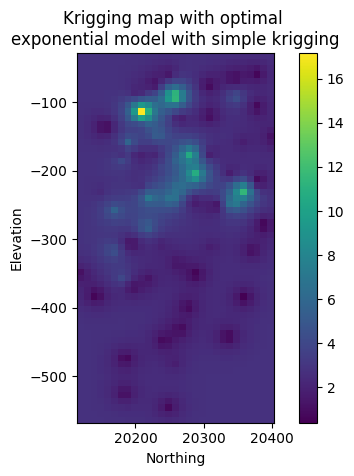

In [94]:
plt.imshow(zstar, extent=[min(x), max(x), min(y), max(y)])
plt.xlabel("Northing")
plt.ylabel("Elevation")
plt.title("Krigging map with optimal \nexponential model with simple krigging")
plt.colorbar()
plt.savefig("../figs/kriggingmap_optimal.pdf")